# Pipeline 

- #### Sentiment Analysis  
- #### Classifier 
- #### Named Entity Recognition
- #### Question Answering 
- #### Summarizing 
- #### Translation

### Use Pipelines to generate content 

- #### Text 
- #### Image 
- #### Audio

In [1]:
# !pip install -q transformers datasets diffusers ipython jupyterlab

In [2]:
#!pip install soundfile

In [3]:
# !pip install ipywidgets

In [4]:
# !pip install sentencepiece

In [5]:
# !pip install accelerate

In [6]:
# Install torch
# https://pytorch.org/get-started/locally/
# nvidia-smi to get the cuda version
# e.g. pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

In [7]:
# Imports 

import torch 
from transformers import pipeline 
from diffusers import DiffusionPipeline 
from datasets import load_dataset 
import soundfile as sf 
from IPython.display import Audio

### Sentiment Analysis

In [8]:
classifier = pipeline("sentiment-analysis") 
result = classifier("I am super excited to be on the way to LLM mastery!") 
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.999354898929596}]


In [9]:
# classifier = pipeline("sentiment-analysis", model=model, device="cuda") 

### Named Entity Recognition

In [10]:
ner=pipeline("ner", grouped_entities=True, device="cuda") 
result = ner("Barrack Obama was the 44th president of the United States")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


[{'entity_group': 'PER', 'score': np.float32(0.99881905), 'word': 'Barrack Obama', 'start': 0, 'end': 13}, {'entity_group': 'LOC', 'score': np.float32(0.998818), 'word': 'United States', 'start': 44, 'end': 57}]


D:\Dev\AI\Ollama\Course\venv_huggingface\lib\site-packages\transformers\pipelines\token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).      
      
`grouped_entities` is deprecated  `aggregation_strategy="simple"`.

### Question Answering with Context

In [11]:
question_answerer=pipeline("question-answering", device="cuda") 
result = question_answerer(question="Who was the 44th president of the United States?", context="Barrack Obama was the 44th president of the United States?") 
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.9769815802574158, 'start': 0, 'end': 13, 'answer': 'Barrack Obama'}


### Text Summarization

In [12]:
summarizer=pipeline("summarization", device="cuda") 

text = """The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP). 
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others. 
It's an extremely popular library that's widely used by the open-source data science community. 
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models. 
"""

summary=summarizer(text, max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP) It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


### Translation

In [13]:
translator=pipeline("translation_en_to_fr", device="cuda") 
result=translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.") 
print(result[0]["translation_text"])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


### Classification

In [14]:
classifier=pipeline("zero-shot-classification", device="cuda") 
result=classifier("Hugging Face's Transformers library is amazing!", candidate_labels=["technology", "sports", "politics"]) 
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': "Hugging Face's Transformers library is amazing!", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9493839144706726, 0.03225010633468628, 0.018365923315286636]}


### Text Generation

In [15]:
generator=pipeline("text-generation", device="cuda") 
result=generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's") 
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's that we never explicitly tell our client if they support each other.

Huge advantages! They all support this workflow, it's only half the beauty


### Image Generation 

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

D:\Dev\AI\Ollama\Course\venv_huggingface\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\R\.cache\huggingface\hub\models--stabilityai--stable-diffusion-2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

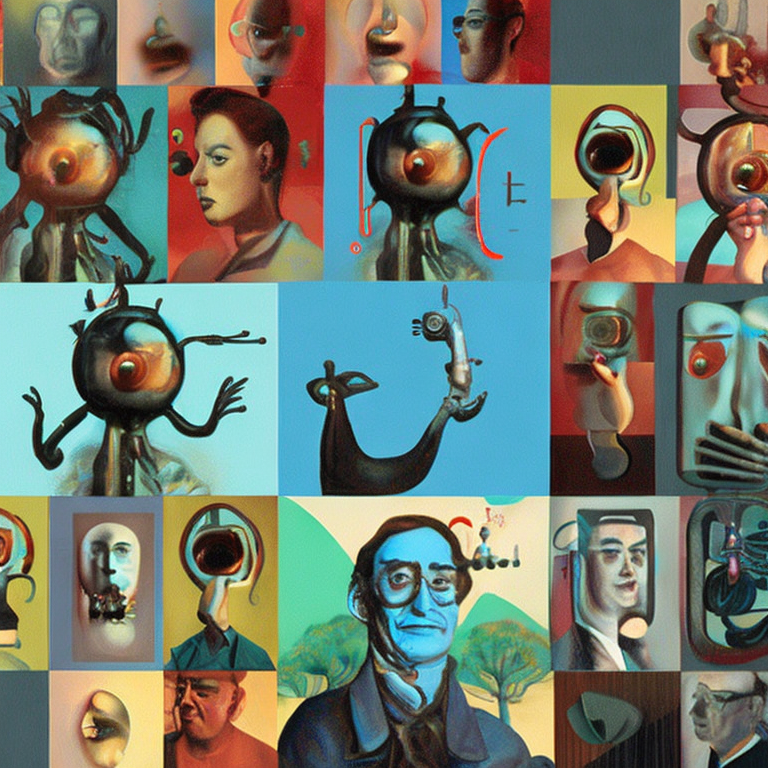

In [16]:
image_gen = DiffusionPipeline.from_pretrained( 
    "stabilityai/stable-diffusion-2", 
    torch_dtype=torch.float16, 
    use_safetensors=True, 
    variant="fp16" 
).to("cuda") 

text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali" 
image=image_gen(prompt=text).images[0] 
image

### Audio Generation 

In [17]:
synthesiser=pipeline("text-to-speech", "microsoft/speecht5_tts", device="cuda") 

embeddings_dataset=load_dataset("Matthijs/cmu-arctic-xvectors", split="validation") 
speaker_embedding = torch.tensor(embeddings_dataset[7306]['xvector']).unsqueeze(0) 

#Added this
forward_params = {
    "speaker_embeddings": speaker_embedding,
} 

# speech=synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speacker_embeddings": speaker_embedding}) 
# replace the above
speech=synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params=forward_params)


sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])  
Audio("speech.wav")

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

D:\Dev\AI\Ollama\Course\venv_huggingface\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\R\.cache\huggingface\hub\models--microsoft--speecht5_tts. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/585M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

Device set to use cuda


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

D:\Dev\AI\Ollama\Course\venv_huggingface\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\R\.cache\huggingface\hub\models--microsoft--speecht5_hifigan. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

D:\Dev\AI\Ollama\Course\venv_huggingface\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\R\.cache\huggingface\hub\datasets--Matthijs--cmu-arctic-xvectors. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


cmu-arctic-xvectors.py:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/50.6M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/21.3M [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/7931 [00:00<?, ? examples/s]